In [34]:
from world import World 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import itertools as it
import util
import pandas as pd

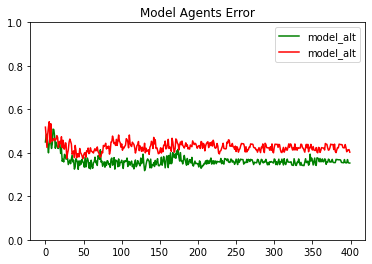

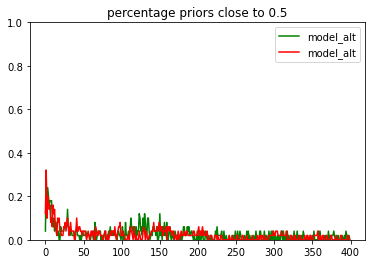

In [53]:
size = 50
t = 400
world = World(state_size = size, time = t, agent=["model_alt", "model_alt"], memory=[5, 5], behav_control=[1, 1], model_var=[1,1])
world.create_agents()
world.run()
agents = world.get_agents()
errors = world.get_errors()
preds = world.get_pred()
priors = world.get_behav_priors()
costs = world.get_costs()
#world.print_results()
time = [t for t in range(len(costs[0]))]

plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'g', label=agents[0])
plt.plot(time, costs[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Model Agents Error")
plt.show()


data = {'time_step': [],
            'agent_a': [],
            'agent_b': []}
'''
for j in range(5):
    initial_a = 0
    initial_b = 0
    for i in range(size):
        i_prior_a = world.get_behav_priors()[i][0][j]
        i_prior_b = world.get_behav_priors()[i][1][j]
        if i_prior_a > 0.4 and i_prior_a < 0.6:
            initial_a += 1
        if i_prior_b > 0.4 and i_prior_b < 0.6:
            initial_b += 1
    data['time_step'].append(j)
    data['agent_a'].append(initial_a/size)
    data['agent_b'].append(initial_b/size)
'''
for k in range(t):
    final_a = 0
    final_b = 0
    for i in range(size):
        f_prior_a = world.get_behav_priors()[i][0][k]
        f_prior_b = world.get_behav_priors()[i][1][k]
        if f_prior_a > 0.4 and f_prior_a < 0.6:
            final_a += 1
        if f_prior_b > 0.4 and f_prior_b < 0.6:
            final_b += 1

    data['time_step'].append(k)
    data['agent_a'].append(final_a/size)
    data['agent_b'].append(final_b/size)
df = pd.DataFrame(data)
plt.figure(facecolor='white') 
plt.plot(data['time_step'], data['agent_a'], 'g', label=agents[0])
plt.plot(data['time_step'], data['agent_b'], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("percentage priors close to 0.5")
plt.show()

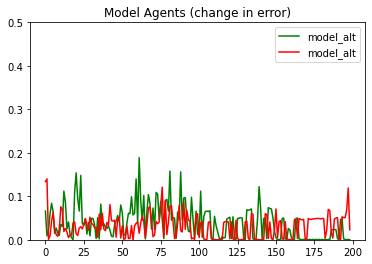

In [10]:
c0 = util.error_convergence(costs[0])
c1 = util.error_convergence(costs[1])

plt.figure(facecolor='white') 
plt.plot(time[0:-1], c0, 'g', label=agents[0])
plt.plot(time[0:-1], c1, 'r', label=agents[1])
plt.ylim([0, 0.5])
plt.legend()
plt.title("Model Agents (change in error)")
plt.show()


 Sigmoid Model Agents: time: 100, memory: 5, state size: 10, model_var: 0, behav_control varied


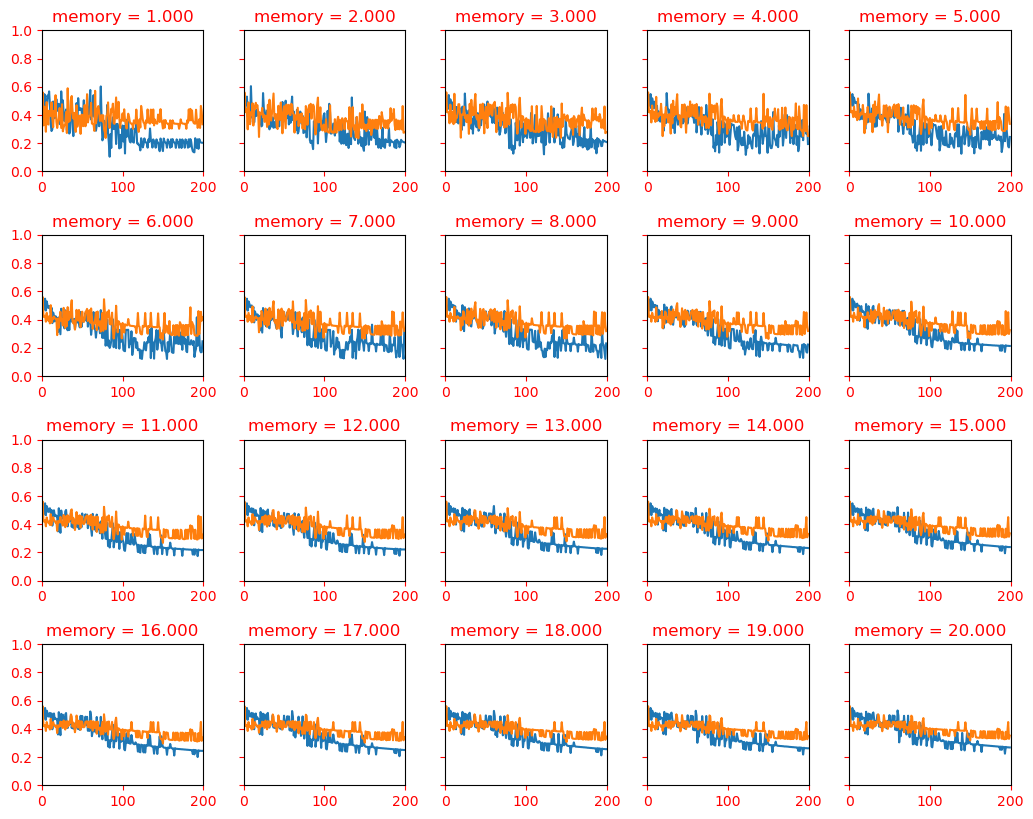

In [9]:
w = 2.5; h = 2.5
ncols = 5
nrows = 4
param_vals = [i for i in range(1, ncols*nrows+1)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
t = 200
time = [i for i in range(t)]

for ix, param in enumerate(param_vals):
    # experiments
    world = World(state_size = 10, time = t, agent=["model_alt", "model_alt"], memory=[param, param], behav_control=[1, 1], seed=7)
    world.create_agents()
    world.run()
    agents = world.get_agents()
    errors = world.get_errors()
    preds = world.get_pred()
    priors = world.get_behav_priors()
    costs = world.get_costs()

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, costs[0])
    ax[ai].plot(time, costs[1])
    ax[ai].set_title('memory = %.3f'%param, color='red')
    ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x', colors='red')
    ax[ai].tick_params(axis='y', colors='red')

print("\n Sigmoid Model Agents: time: 100, memory: 5, state size: 10, model_var: 0, behav_control varied")
plt.show()


 Agents Averaging their Past Predictions: time steps=20, memory=5, varied state size


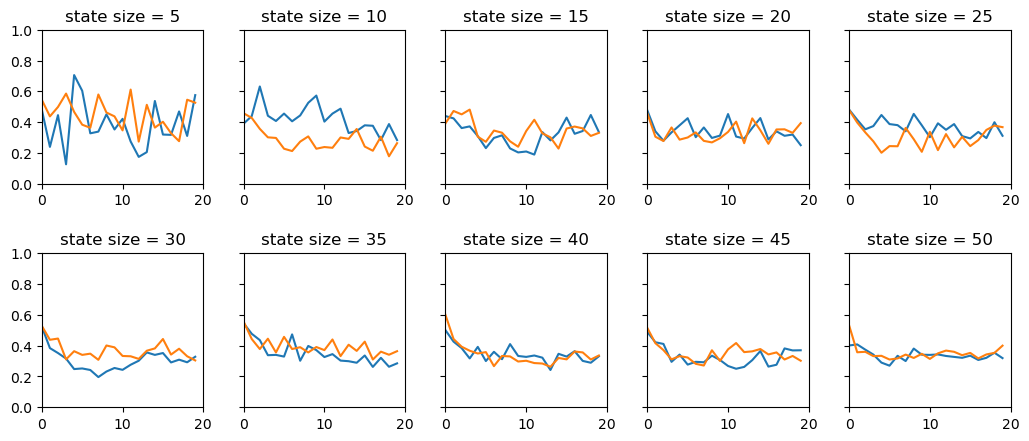

In [6]:
w = 2.5; h = 2.5
ncols = 5
nrows = 2
param_vals = [i*5 for i in range(1, ncols*nrows+1)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
t = 20
time = [i for i in range(t)]

for ix, param in enumerate(param_vals):
    # experiments
    world = World(state_size = param, time = t, agent=["prediction", "prediction"], memory=[4, 4])
    world.create_agents()
    world.run()
    agents = world.get_agents()
    errors = world.get_errors()
    preds = world.get_pred()
    priors = world.get_behav_priors()
    costs = world.get_costs()

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, costs[0])
    ax[ai].plot(time, costs[1])
    ax[ai].set_title('state size = %.0f'%param)
    ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x')
    ax[ai].tick_params(axis='y')

print("\n Agents Averaging their Past Predictions: time steps=20, memory=5, varied state size")
plt.show()

### When does error cease to improve?

### How quickly does it plateau?

In [7]:
def convergence_test(x, epsilon=0.1, var=.8):
    '''
    takes:
    x         a list of values
    epsilon   a threshold of error change
    var       a proportion of transitions that must remain within
    
    An asymptote means that a proportion (var) of steps are less than
    the threshold (epsilon). Asymptotes must last at least 10% of timesteps 
    
    returns steps to convergence & plateau
    '''
    # when do we hit an asymptote?
    times_converged = []
    # where does error locally plateau?
    asymptotes = []
    # how long must an asymptote be?
    a_len = int(len(x) * .1)
    # are we on an asymptote?
    on_asymptote = False 
    # start of an asymptote
    a_start = 0
    # record of passed threshold tests
    c = []
    # check difference in error for each timestep
    for i in range(len(x)-1):
        j = i+1
        # error improved less than the threshold
        if x[j] - x[i] < epsilon:
            # current timestep passed
            c.append(1)
            if not on_asymptote:
                if j >= a_len:
                    # if we are not on an asymptote and not just starting, increment start
                    a_start += 1
                # verify if we are on asymptote
                on_asymptote = check_convergence(c[a_start:j], var)
            elif not check_convergence(c[a_start: j], var):
                #
                if j >= a_len:
                    # no longer on asymptote
                    times_converged.append(a_start)
                    e_avg = sum(x[a_start:j])/len(x[a_start:j])
                    asymptotes.append(e_avg)
                    a_start += 1                                    
        else:
            # current timestep failed
            c.append(0)
            on_asymptote = check_convergence(c[a_start:j], var)
            if not on_asymptote and j >= a_len:
                # increment start if not at beginning
                a_start += 1 
                
    return times_converged, asymptotes    

def check_convergence(c, var):
    '''
    takes:
    c      list of binary values indicating error below threshold
    var    proporiton of values that need to be below the threshold
    
    returns boolean indicating convergence
    '''
    avg_c = sum(c)/len(c)
    return avg_c >= var

In [8]:
con, asy = convergence_test(costs[0])
print(con)
print('\n')
print(asy)

[]


[]
